# 使用预训练卷积神经网络模型

在图像小数据集上进行深度学习的一种常见和高效的方法是利用预先训练好的网络模型。预先训练好的网络模型只是一个先前在大型数据集上训练过后保存下来的网络模型，通过是进行了大规模的图像分类任务。

如果这个原始数据集足够大且足够普遍，那么由训练有素的网络学习到的空间特征层次可以有效的作为我们进行机器视觉学习的通用模型，因此其特征可以证明对许多不同的机器视觉问题是通用的，甚至尽管这些新问题可能涉及与原始任务完全不同的类型。

例如，可以在ImageNet上训练一个网络，其中图像类别主要是动物和日用品，然后重新使用这个训练好的网络模型，用来识别图像中的家具。与许多耳熟能详的浅层学习方法相比，不同问题的学习特征的这种可移植性是深度学习的一个主要优点，它使深度学习对于小数据图像分类问题非常有效。

在此次任务中，我们将使用由Karen Simonyan和Andrew Zisserman于2014年开发的VGG16架构，这是一种简单而广泛使用的ImageNet架构。VGG16相比于后来开发的新的模型架构而言可能数据参数量要大的多，模型性能也会略差一些，我们之所以选择VGG16，主要是考虑到对VGG16架构更为熟悉，容易理解，而且不需要引入任何其他新的概念。

这可能是我们第一次看到以下的名称：VGG，ResNet，Inception，Inception-ResNet，Xception，DenseNet...但之后我们会慢慢熟悉他们。

有两种方法可以用来利用预训练的神经网络模型：特征提取feature extraction和微调fine-tuning。接下来我们先介绍特征提取。

### 以下都是在上一篇中用到过的数据集构建过程

In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

Platform: Windows-10-10.0.17134-SP0
Tensorflow version: 1.9.0
Keras version: 2.2.2


Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

In [32]:
import os

ROOT_DIR = os.getcwd()
DATA_PATH = "D:/Working Folder/packages/train"

D:\Working Folder\Machine Learning\Tutorials\kaggle\cats vs. dogs


In [4]:
import os
import shutil

base_dir = os.path.join(ROOT_DIR,"data/cats_and_dogs_small")
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir,"train")
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,"validation")
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir,"test")
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
train_cats_dir = os.path.join(train_dir,"cats")
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    
train_dogs_dir = os.path.join(train_dir,"dogs")
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,"cats")
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
    
validation_dogs_dir = os.path.join(validation_dir,"dogs")
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    
test_cats_dir = os.path.join(test_dir,"cats")
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
    
test_dogs_dir = os.path.join(test_dir,"dogs")
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [5]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(train_cats_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 1000 cat images to train_cats_dit complete!")

fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(validation_cats_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 cat images to validation_cats_dit complete!")

fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(test_cats_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 cat images to test_cats_dit complete!")

Copy fisrt 1000 cat images to train_cats_dit complete!
Copy fisrt 500 cat images to validation_cats_dit complete!
Copy fisrt 500 cat images to test_cats_dit complete!


In [6]:
fnames = ["dog.{}.jpg".format(i) for i in range(0,1000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(train_dogs_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 1000 dog images to train_dogs_dit complete!")

fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 dog images to validation_dogs_dit complete!")

fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(DATA_PATH,fname)
    dst = os.path.join(test_dogs_dir,fname)
    if not os.path.exists(dst):
        shutil.copyfile(src,dst)
print("Copy fisrt 500 dog images to test_dogs_dit complete!")

Copy fisrt 1000 dog images to train_dogs_dit complete!
Copy fisrt 500 dog images to validation_dogs_dit complete!
Copy fisrt 500 dog images to test_dogs_dit complete!


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 特征提取 feature extraction

特征提取包括了使用预训练好的网络模型来从新样本中提取特征，这些特征通过一个“新”的分类器来实现分类任务。

如前所述，用于图像分类的卷积神经网络架构包括了两大部分：它们以一系列卷积和池化层开始，并且以全连接的分类器结束。第一部分称之为模型的“卷积基底”。在卷积神经网络中，“特征提取”将简单的包括先前训练过的网络的“卷积基底”，通过它重新喂入新的数据，并且根据这个“卷积基底”的输出，用于训练一个新的分类器。

为什么只用到“卷积基底”呢？我们是否可以将全连接层也包括进来？一般来说，应该避免。简单的来说，“卷积基底”学习到的是图像的基础特征，是可以通用使用的；一个卷积网络的特征层是一个通用概念对应到图片的映射。全连接层是对学习到的基础特征的再次组合、抽象，由全连接层分类器学习到的特征对特定于模型任务的类别集合会非常敏感。

此外，在全连接层发现的表示不再包含有关“空间/位置”对应于输入图像中的任何信息，对于分类目标位置重要且敏感的问题，全连接层的功能将在很大程度上是无法重复利用的。

注意，由于特定卷积层提取到的表示的一般性的级别取决于神经网络模型中神经层的深度，在模型中较早的层提取到局部，高度通用的特征（比如视觉边缘，颜色和纹理），而较高层则组合提取到更多的抽象概念（如“猫的耳朵”或“狗的眼睛”）。因此，如果我们的新数据集与预训练模型的训练数据集有很大的不同，那么最好只使用模型的前几个层进行特征的提取，而不是使用整个“卷积基底”。

在我们的任务中，由于ImageNet集合包含多个dog和cat的类，所以使用包含在原始模型全连接层中的信息可能是有益的。但是为了覆盖更多的一般情况，我们将不会选择预训练模型的全连接层。

VGG16模型已经封装在keras中，可以通过`keras.application`进行调用。以下是keras.applications中还包含的预训练模型列表：
* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

In [8]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3),pooling='MAX')

In [9]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

最后的输出特征形状为(4,4,512)，这是我们将要连接到全连接分类器的输入张量。

到此，我们有两种方式利用“卷积基底”：

* 1.在我们的数据集上运行“卷积基底”，将其输出以numpy.arrary的形式存储下来，然后将这个数据作为另外一个独立的分类器的输入。这种解决方案非常快速且简单，因为它只需要为每个输入图像运行一次“卷积基底”，将“卷积基底”的输出收集起来。当然，由于这种操作模式，也使得我们不能去使用数据增强的方法。

* 2.通过在已经训练好的模型的卷积基底顶端，继续添加几个Dense层，扩增我们已经拥有了的“卷积基底”，同时控制“卷积基底”模型的权重可训练，一直保持不变，仅仅训练后续添加的那几个Dense层。这样就可以保持端到端的训练模型了，这样的做法也允许我们使用数据增强的方法。由于每次输入图像都要经过“卷积基底”，训练时间也会比第一种方法要多的多。

### 方法1：卷积基底：提取特征+串接新的全连接分类器：重新训练

#### 移花

In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size= 20

def extract_features(directory,sample_count):
    features = np.zeros((sample_count,4,4,512))
    labels = np.zeros(sample_count)
    
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch,labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    print('extract_features complete!')
    return features,labels

In [11]:
train_features,train_labels = extract_features(train_dir,2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!
Found 1000 images belonging to 2 classes.
extract_features complete!


由于提取到的特征形状是(n_samples,4,4,512)，我们要将其先拉直，再作为全连接层分类器的输入数据形式。

In [12]:
train_features = train_features.reshape(len(train_features),-1)
validation_features = validation_features.reshape(len(validation_features),-1)
test_features = test_features.reshape(len(test_features),-1)

#### 接木

In [13]:
from keras import models
from keras import layers
from keras import optimizers

In [16]:
model = models.Sequential()
model.add(layers.Dense(units=512,activation='selu',kernel_initializer='lecun_normal',input_shape=(4*4*512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=128,activation='selu',kernel_initializer='lecun_normal',input_shape=(4*4*512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1,kernel_initializer='lecun_normal',activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [17]:
history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features,validation_labels),
                    verbose=1)

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6233 - acc: 0.6685 - val_loss: 0.3770 - val_acc: 0.8600
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4202 - acc: 0.8065 - val_loss: 0.3186 - val_acc: 0.8720
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3360 - acc: 0.8540 - val_loss: 0.2834 - val_acc: 0.8880
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3103 - acc: 0.8680 - val_loss: 0.2694 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2616 - acc: 0.8910 - val_loss: 0.2614 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2436 - acc: 0.8990 - val_loss: 0.2504 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2295 - acc: 0.9060 - val_loss: 0.2535 - val_acc: 0.8980
Epoch 8/30
200

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

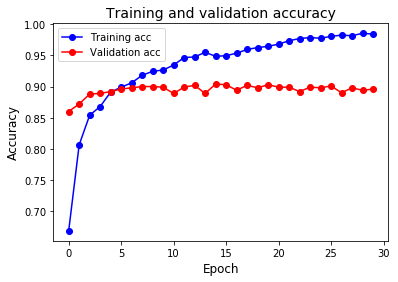

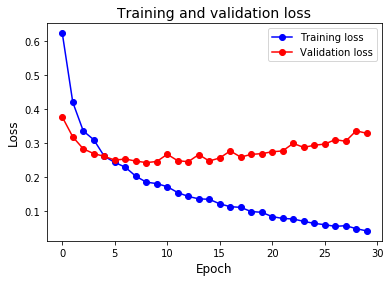

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, acc, 'o-',color='blue',label='Training acc')
plt.plot(epochs, val_acc, 'o-', color='red',label='Validation acc')
plt.title('Training and validation accuracy',fontsize=14)
plt.xlabel("Epoch",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'o-',color='blue',label='Training loss')
plt.plot(epochs, val_loss, 'o-', color='red',label='Validation loss')
plt.title('Training and validation loss',fontsize=14)
plt.xlabel("Epoch",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.legend()

plt.show()

从上图可以看出，我们的验证机准确率达到了90%，已经远超之前从零构造的CNN模型的性能。然而上图也反应，我们似乎从一开始模型就过拟合了，尽管我们已经加了相当高比例的Dropout。

### 方法2：卷积基底：冻结+串接新的全连接分类器->>重新训练

#### 移花+接木

In [18]:
from keras import models
from keras import layers

In [20]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='selu',kernel_initializer='lecun_normal',input_shape=(4*4*512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=128,activation='selu',kernel_initializer='lecun_normal',input_shape=(4*4*512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1,kernel_initializer='lecun_normal',activation='sigmoid'))

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total para

如上所示，VGG16的“卷积基底”就有14,714,668个参数，数量非常大，我们后续添加的全连接分类器也有2,097,408个参数。

接下来我们需要做的是，将“卷积基底”的参数进行冻结，意味着这些层的参数权重在训练期间是不会被更新的。如果我们不这么做，那么以前在“卷积基底”上学到的特征将在训练期间被修改。由于我们新添加的全连接层都是随机初始化的，因此非常大的权重更新将通过网络重新进行传播，也会破坏掉“卷积基底”已经学习到了的特征。

In [22]:
conv_base.trainable = False

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total para

通过这样的设置，我们从上面可以发现，conv_base层的权重参数已经全部设置为冻结，整个model仅需要训练后添加的全连接层分类器的权重。现在，我们可以开始训练我们的模型，并且使用之前学习到的数据增强的技术。

In [29]:
from keras.preprocessing.image import ImageDataGenerator
from keras import losses,optimizers,metrics

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=1)

Epoch 1/30
100/100 [==============================] - 70s 697ms/step - loss: 0.5706 - acc: 0.7340 - val_loss: 0.3062 - val_acc: 0.8720
Epoch 2/30
100/100 [==============================] - 73s 729ms/step - loss: 0.5274 - acc: 0.7675 - val_loss: 0.2997 - val_acc: 0.8750
Epoch 3/30
100/100 [==============================] - 73s 729ms/step - loss: 0.4961 - acc: 0.7840 - val_loss: 0.2864 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 73s 728ms/step - loss: 0.4736 - acc: 0.7880 - val_loss: 0.2689 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 73s 726ms/step - loss: 0.4464 - acc: 0.8005 - val_loss: 0.3062 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 73s 727ms/step - loss: 0.4374 - acc: 0.8090 - val_loss: 0.2958 - val_acc: 0.8820
Epoch 7/30
100/100 [==============================] - 73s 727ms/step - loss: 0.4116 - acc: 0.8200 - val_loss: 0.2729 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 7

KeyboardInterrupt: 